회귀 - 캘리포니아 하우징

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [3]:
df = pd.DataFrame(house.data, columns = house.feature_names)
df['target'] = house.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.shape

(20640, 9)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    house.data, house.target, test_size=0.1, random_state=seed
)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(20, input_dim=8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1),   # 회귀에서는 출력층에 활성화 함수 사용 X

])

In [9]:
model.compile('rmsprop', 'mean_squared_error')  # 회귀에서는 metrics 사용하지 않음

In [11]:
hist1 = model.fit(X_train, y_train, validation_split=0.1,
                  epochs=100, batch_size=256)

Epoch 1/100
66/66 [==============================] - 0s 3ms/step - loss: 14.9843 - val_loss: 29.1249
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 12.7390 - val_loss: 7.6283
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 14.2678 - val_loss: 5.8920
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 14.2939 - val_loss: 1.1102
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 12.5139 - val_loss: 0.7231
Epoch 6/100
66/66 [==============================] - 0s 3ms/step - loss: 16.9404 - val_loss: 0.7059
Epoch 7/100
66/66 [==============================] - 0s 4ms/step - loss: 12.0525 - val_loss: 0.7116
Epoch 8/100
66/66 [==============================] - 0s 4ms/step - loss: 13.4763 - val_loss: 0.6939
Epoch 9/100
66/66 [==============================] - 0s 5ms/step - loss: 12.7016 - val_loss: 55.2430
Epoch 10/100
66/66 [==============================] - 0s 4ms/step - loss: 13.5291 - val_loss: 7.85

In [12]:
model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.9026


0.90257728099823

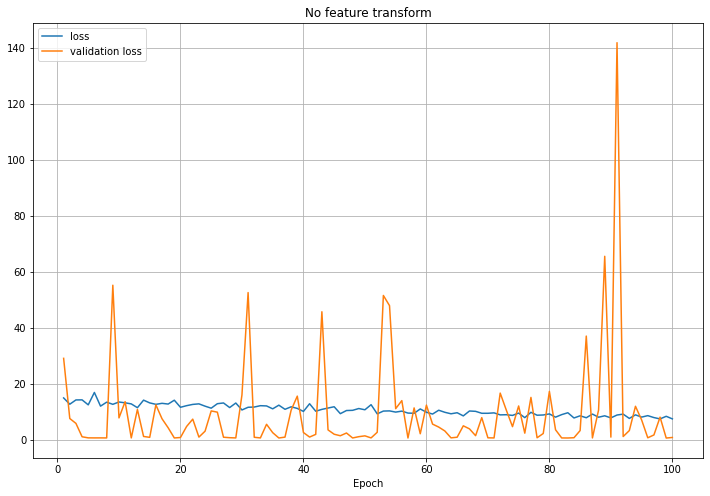

In [18]:
y_loss = hist1.history['loss']
y_vloss = hist1.history['val_loss']
xs = np.arange(1, len(y_loss) + 1)
plt.figure(figsize=(12, 8))
plt.plot(xs, y_loss, label='loss')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
# plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

In [19]:
pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.29674103073743396

In [22]:
from sklearn.metrics import r2_score, mean_squared_error
mean_squared_error(y_test, pred)

0.9025771070622197

In [21]:
dft = pd.DataFrame({'y_test' : y_test, 'pred': pred.reshape(-1)})
dft.head()

,y_test,pred
0,4.771,3.662968
1,1.371,1.330570
2,1.233,1.178135
3,0.938,1.430783
4,3.260,2.616162
